# <center>Supervised_Modeling_with_Emphasis_on_LAUC<center>

## Import libraries

In [394]:
import h2o
import numpy as np
import pandas as pd
import sklearn 
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.preprocessing import sequence
from keras.utils import plot_model
from keras import optimizers
import xgboost

Using TensorFlow backend.


In [222]:
PATH = 'Dataset/'
PATH_TO_train_data = PATH + 'train.csv'
PATH_TO_test_data = PATH + 'test.csv'
PATH_TO_header = PATH + 'header.csv'

In [224]:
header_data = pd.read_csv(PATH_TO_header)
columns_names = np.array(header_data.loc[0:1])[0]
columns_names

array(['K', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'L'], dtype=object)

In [225]:
train_data = pd.read_csv(PATH_TO_train_data, names=columns_names, header=None)
train_data.drop(columns='K', inplace=True)

In [226]:
train_data.shape

(406709, 55)

In [227]:
train_data.head()

,N,N.1,N.2,N.3,N.4,N.5,N.6,N.7,N.8,N.9,...,C.35,C.36,C.37,C.38,C.39,C.40,C.41,C.42,C.43,L
0,3452,111,22,433,214,3677,252,210,74,3316,...,0,0,0,0,0,0,0,1,0,0
1,3093,95,9,124,7,4115,234,227,124,2930,...,0,0,0,0,0,0,0,0,0,1
2,2551,61,17,90,5,726,231,202,98,751,...,0,0,0,0,0,0,0,0,0,1
3,2944,135,3,430,13,1868,224,238,149,1199,...,0,0,0,0,0,0,0,0,0,1
4,3030,327,34,277,101,1973,120,181,190,1693,...,0,1,0,0,0,0,0,0,0,1


## Distribution of classes. As we can see, the data is balanced.

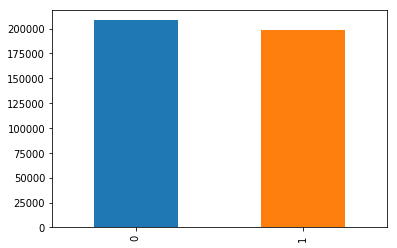

In [228]:
%matplotlib inline

train_data.L.value_counts().plot('bar')

## Drop highly correlated columns.

In [229]:
X_train = train_data.drop(columns='L')
y_train = train_data.L

In [230]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [235]:
to_drop

[]

There are no highly correlated columns as the list is empty.

## Drop duplicates from the train data.

In [244]:
X_train.shape

(406709, 54)

In [241]:
duplicates = X_train.duplicated(keep=False)

In [243]:
X_train[~duplicates].shape

(406709, 54)

There are no duplicates in the data. The shape of the train data is same before and after dropping the duplicates.

## Test data

In [245]:
test_data = pd.read_csv(PATH_TO_test_data, names=columns_names, header=None)
# Drop Key and Label columns.
X_test = test_data
X_test = X_test.drop(columns=['K', 'L'])

In [246]:
X_test.shape

(174303, 54)

## Function for finding feature importance.

In [262]:
def feature_importance(model, X_train):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X_train.columns
    important_features = []
    important_features_scores = []
    for index in indices:
        important_features.append(features[index])
        important_features_scores.append(importances[index])
    feature_importance_df = pd.Series(data=important_features_scores, index=important_features)
    return feature_importance_df

## Modelling

In [315]:
# dtClassifier = DecisionTreeClassifier()
# model = dtClassifier.fit(X_train, y_train)

# rfClassifier = RandomForestClassifier()
# model = rfClassifier.fit(X_train, y_train)

# xgb = xgboost.XGBClassifier(n_estimators=1500, learning_rate=0.05, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=15)
# model = xgb.fit(X_train, y_train)

In [294]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [295]:
import pickle
pkl_filename = "pickle_model_1.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model, file)

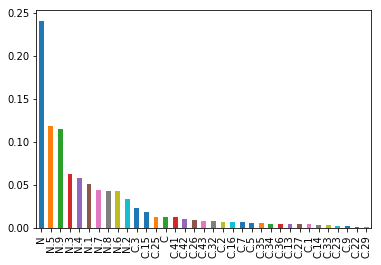

In [297]:
feature_importance_df = feature_importance(model, X_train)
feature_importance_df.iloc[:35].plot('bar')

In [298]:
y_train_pred = model.predict(X_train)
Accuracy = accuracy_score(y_train, y_train_pred) * 100
F1_score = f1_score(y_train, y_train_pred, average='weighted')

In [299]:
y_train_pred

array([0, 1, 1, ..., 0, 1, 0])

In [300]:
Accuracy, F1_score

(99.81313420652113, 0.9981313035487634)

In [301]:
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_pred)

In [302]:
fpr, tpr

(array([0.        , 0.00103191, 1.        ]),
 array([0.        , 0.99725243, 1.        ]))

In [303]:
auc = metrics.roc_auc_score(y_train, y_train_pred)
auc

0.9981102605803505

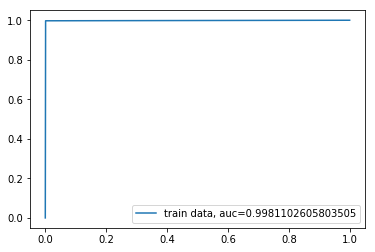

In [304]:
plt.plot(fpr,tpr,label="train data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [311]:
y_test_proba = model.predict_proba(X_test)
probabilities_of_class_one = y_test_proba[:, 1]

In [312]:
y_test = pd.DataFrame({'key': test_data.K, 'score': probabilities_of_class_one})

In [313]:
y_test.to_csv('predictions.csv', index=False)

In [314]:
y_test.head()

,key,score
0,258918,0.2
1,258134,0.9
2,165265,0.7
3,522141,0.7
4,569662,0.9


## Analyze features of xgboost and Random Forest.

In [316]:
with open('xgboost_classifier.pkl', 'rb') as file:  
    model_xgboost = pickle.load(file)

In [317]:
with open('random_forest_classifier.pkl', 'rb') as file:  
    model_rf = pickle.load(file)

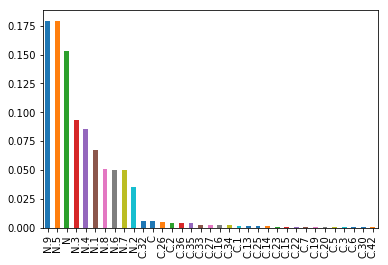

In [323]:
fimp_xgboost = feature_importance(model_xgboost, X_train)
fimp_xgboost.iloc[:35].plot('bar')

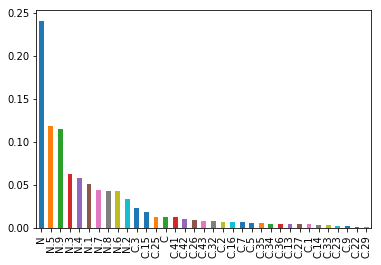

In [324]:
fimp_rf = feature_importance(model_rf, X_train)
fimp_rf.iloc[:35].plot('bar')

Combining top 27 features from xgboost and top 34 features from random forest.

In [358]:
imp_feature_columns = list(set(list(fimp_rf.head(34).index) + list(fimp_xgboost.head(27).index)))

In [359]:
imp_feature_columns

['C.2',
 'C.7',
 'N.1',
 'N.3',
 'C.33',
 'C.1',
 'C.5',
 'N.5',
 'C.16',
 'N.9',
 'N.8',
 'N.7',
 'C.43',
 'C.25',
 'N.4',
 'C.27',
 'C.35',
 'C.34',
 'C.26',
 'C.3',
 'N.2',
 'N.6',
 'N',
 'C.9',
 'C.41',
 'C.14',
 'C.32',
 'C.22',
 'C.23',
 'C.36',
 'C.15',
 'C.42',
 'C',
 'C.13']

In [364]:
X_train_imp = X_train.loc[:, imp_feature_columns]

In [365]:
X_train.shape

(406709, 54)

In [366]:
X_train_imp.shape

(406709, 34)

In [408]:
rfClassifier = RandomForestClassifier()
model = rfClassifier.fit(X_train_imp, y_train)

# xgb = xgboost.XGBClassifier(n_estimators=1500, learning_rate=0.05, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=15)
# model = xgb.fit(X_train_imp, y_train)

In [382]:
import pickle
pkl_filename = "pickle_model_1.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model, file)

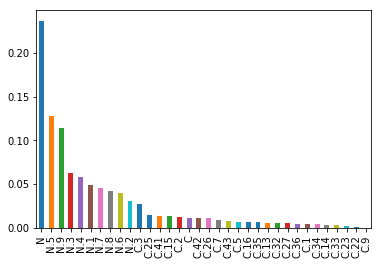

In [409]:
feature_importance_df = feature_importance(model, X_train_imp)
feature_importance_df.iloc[:35].plot('bar')

In [410]:
y_train_pred = model.predict(X_train_imp)
Accuracy = accuracy_score(y_train, y_train_pred) * 100
F1_score = f1_score(y_train, y_train_pred, average='weighted')

In [411]:
y_train_pred

array([0, 1, 1, ..., 0, 1, 0])

In [412]:
Accuracy, F1_score

(99.81731409926999, 0.9981731048667802)

In [413]:
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_pred)
auc = metrics.roc_auc_score(y_train, y_train_pred)

In [437]:
auc

0.9981528707645047

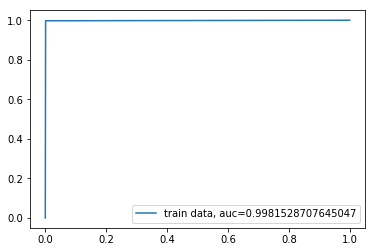

In [414]:
plt.plot(fpr,tpr,label="train data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [415]:
X_test_imp = X_test.loc[:, imp_feature_columns]

In [416]:
y_test_proba = model.predict_proba(X_test_imp)
probabilities_of_class_one = y_test_proba[:, 1]

In [417]:
y_test = pd.DataFrame({'key': test_data.K, 'score': probabilities_of_class_one})
# y_test.to_csv('predictions.csv', index=False)

In [418]:
y_test.head()

,key,score
0,258918,0.4
1,258134,0.6
2,165265,0.9
3,522141,1.0
4,569662,0.9
